# 1) Delivery_time -> Predict delivery time using sorting time 
## here input =sorting time
## output=delivery time

In [263]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [264]:

DT=pd.read_csv("delivery_time.csv")
DT.rename(columns={'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},inplace=True)
DT

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### initial analysis

In [265]:
DT.shape

(21, 2)

In [266]:
DT.isna().sum()

delivery_time    0
sorting_time     0
dtype: int64

In [267]:


DT.dtypes

delivery_time    float64
sorting_time       int64
dtype: object

### we performed all the inital analysis

## Assumptions ->->-> check

### 1. check for linearity

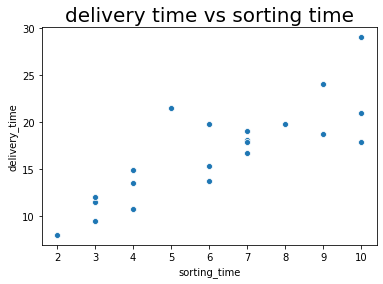

In [268]:
sns.scatterplot(x='sorting_time',y='delivery_time',data=DT)
plt.title('delivery time vs sorting time',size=20)
plt.show()

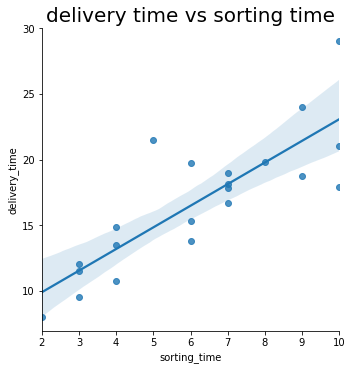

In [269]:
sns.lmplot(x='sorting_time',y='delivery_time',data=DT)
plt.title('delivery time vs sorting time',size=20)
plt.show()

#### some what linear

### check for normality

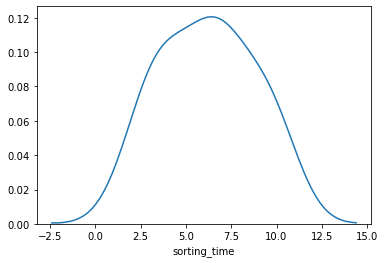

In [270]:
sns.distplot( DT['sorting_time'],hist=False)

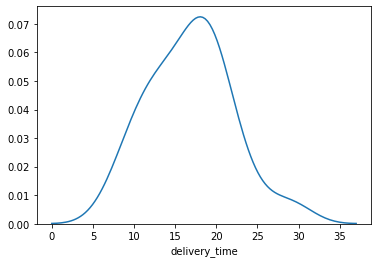

In [271]:
sns.distplot( DT['delivery_time'],hist=False)

##### it is normaily distributed 

## corrilation

In [272]:
 DT.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


### it is 82.5 percent corrilated

### no multicollinarity :-> as there in only one input ,so no dependency between the input variable

# model building| model training 
as in stats model -> model building and training encounter at the same time

In [273]:
import statsmodels.formula.api as smf

In [274]:
 lin_reg_model=smf.ols('delivery_time ~ sorting_time',data= DT).fit()## model training and building is done

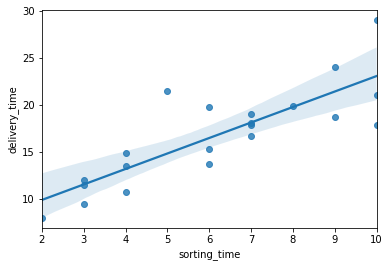

In [275]:
sns.regplot(x="sorting_time", y="delivery_time", data= DT)
plt.show()

## model evaluation

In [276]:
# coefficients
lin_reg_model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [277]:
lin_reg_model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

## hypohesis formulation:-
H0= it is not a significant paramters   when>0.05  ,
Ha= it is significant parameters      when<0.05
### so we reject the null hypothesis as it is significant i.e pvalues<0.05

In [278]:
#R squared values
(lin_reg_model.rsquared,lin_reg_model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [279]:
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           3.98e-06
Time:                        22:22:46   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  manual testing

In [280]:
# coefficients
lin_reg_model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [281]:

 x=11

1.649020*11+ 6.582734





24.721953999999997

In [282]:

 x=12

1.649020*12+ 6.582734

26.370973999999997

In [283]:

 x=13
    
1.649020*13+ 6.582734


28.019993999999997

In [284]:

 x=14

1.649020*14+ 6.582734




29.669013999999997

In [285]:

 x=15

1.649020*15+ 6.582734


31.318033999999997

### model testing

In [286]:
#Predict for 11,12,13,14,15 sorting times
newdata=pd.Series([11,12,13,14,15])

In [287]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [288]:
lin_reg_model.predict(data_pred)

0    24.721953
1    26.370973
2    28.019993
3    29.669013
4    31.318032
dtype: float64

In [289]:
from statsmodels.graphics.regressionplots import influence_plot

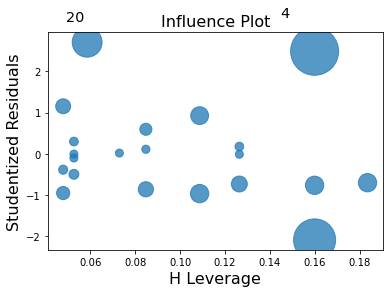

In [290]:
influence_plot(lin_reg_model)
plt.show()


In [291]:
import warnings
warnings.filterwarnings('ignore')

### checking for outliers with the help of cooks distance

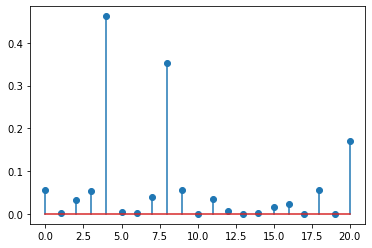

In [292]:
lin_reg_model_influence=lin_reg_model.get_influence()
(c,_)=lin_reg_model_influence.cooks_distance
# plot the influence values using stem plot
#fig=plt.subplot(fig size=(20,7))
plt.stem(np.arange(len(DT)),np.round(c,3))
#plt.xlable('Row index')
#plt.ylable('cooks distance')
plt.show()

##  removing outliers from our data to give more contribution

In [293]:
DT[DT.index.isin([4, 8,20])]

,delivery_time,sorting_time
4,29.0,10
8,17.9,10
20,21.5,5


In [294]:
DT_no_outliers=DT.drop( axis=0, index=[4,8,20] ,inplace=False, errors='raise')
DT_no_outliers

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
5,15.35,6
6,19.00,7
7,9.50,3
9,18.75,9
10,19.83,8
11,10.75,4


In [295]:
DT_no_outliers.shape

(18, 2)

## now we have DT_no_outliers data actually it is removed ouliers data to considering this 
data we again do assumptions check and see that if contribution increases or not

## Assumptions ->->-> check

### 1. check for linearity

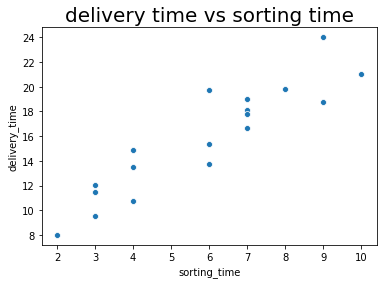

In [296]:
sns.scatterplot(x='sorting_time',y='delivery_time',data=DT_no_outliers)
plt.title('delivery time vs sorting time',size=20)
plt.show()

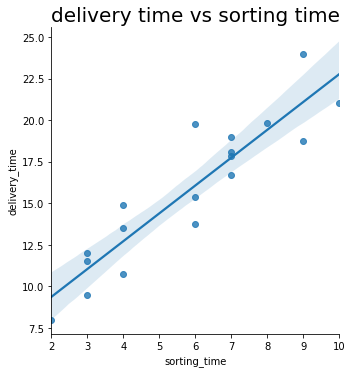

In [297]:
sns.lmplot(x='sorting_time',y='delivery_time',data=DT_no_outliers)
plt.title('delivery time vs sorting time',size=20)
plt.show()

####  better linearity than above

### check for normality

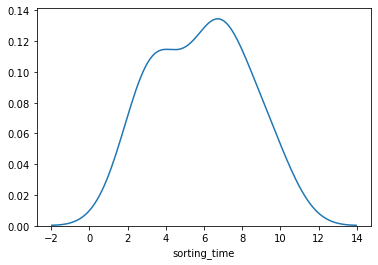

In [298]:
sns.distplot(DT_no_outliers['sorting_time'],hist=False)

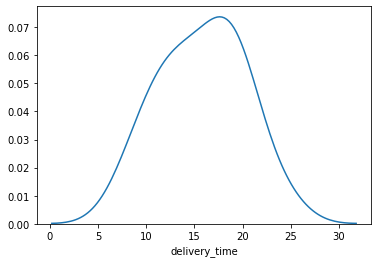

In [299]:
sns.distplot(DT_no_outliers['delivery_time'],hist=False)

##### it is normaily distributed 

In [300]:
DT_no_outliers.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.912816
sorting_time,0.912816,1.000000


### now it is 91 percent corrilated

### no multicollinarity :-> as there in only one input ,so no dependency between the input variable

# model building| model training 
as in stats model -> model building and training encounter at the same time

In [301]:
import statsmodels.formula.api as smf

In [302]:
 model1=smf.ols('delivery_time ~ sorting_time',data=DT_no_outliers).fit()## model training and building is done

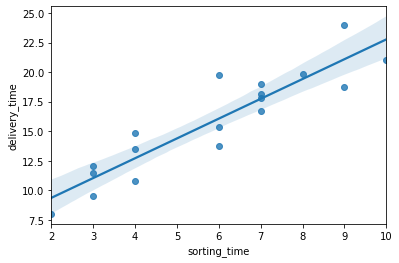

In [303]:
sns.regplot(x="sorting_time", y="delivery_time", data=DT_no_outliers)
plt.show()

## model evaluation

In [304]:
# coefficients
model1.params

Intercept       6.024001
sorting_time    1.674076
dtype: float64

In [305]:
model1.pvalues

Intercept       1.015144e-04
sorting_time    1.273152e-07
dtype: float64

## hypohesis formulation:-
H0= it is not a significant paramters   when>0.05  ,
Ha= it is significant parameters      when<0.05
### so we reject the null hypothesis as it is significant i.e pvalues<0.05

In [306]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.8332330202945817, 0.822810084062993)

### here we can see that the contribution of r2 and aj_r2 increases from 66 to 83 percentanges

In [307]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     79.94
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           1.27e-07
Time:                        22:23:05   Log-Likelihood:                -35.450
No. Observations:                  18   AIC:                             74.90
Df Residuals:                      16   BIC:                             76.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.0240      1.175      5.126      0.000       3.533       8.515
sorting_time     1.6741      0.187      8.941      0.000       1.277       2.071
==============================================================================
Omnibus:                        1.044   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                0.959
Skew:                           0.447   Prob(JB):                        0.619
Kurtosis:                       2.307   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## with the help of summary we can see the lot of changes in AIC BIC values
### skewness ,kurtosis

###  manual testing

In [308]:
# coefficients
model1.params

Intercept       6.024001
sorting_time    1.674076
dtype: float64

In [309]:

 x=11
1.674076*11+6.024001





24.438837

In [310]:

 x=12
1.674076*12+6.024001



26.112913

In [311]:

 x=13

1.674076*13+6.024001


27.786989

In [312]:

 x=14

1.674076*14+6.024001


29.461064999999998

In [313]:

 x=15

1.674076*15+6.024001


31.135140999999997

### model testing

In [314]:
#Predict for 11,12,13,14,15 sorting times
newdata=pd.Series([11,12,13,14,15])

In [315]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [316]:
model1.predict(data_pred)
# the answer of manual testing and model testing is same ,it indicates that our model is functioning properly

0    24.438837
1    26.112913
2    27.786989
3    29.461065
4    31.135141
dtype: float64

In [317]:
from statsmodels.graphics.regressionplots import influence_plot

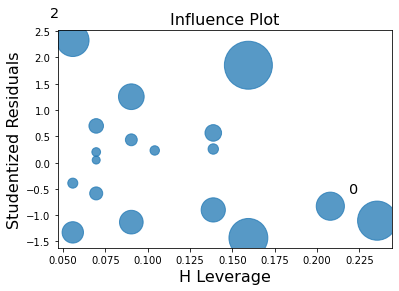

In [318]:
influence_plot(model1)
plt.show()


In [319]:
import warnings
warnings.filterwarnings('ignore')

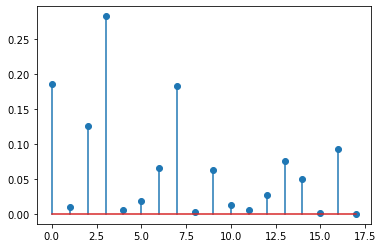

In [320]:
model1_influence=model1.get_influence()
(c,_)=model1_influence.cooks_distance
# plot the influence values using stem plot
#fig=plt.subplot(fig size=(20,7))
plt.stem(np.arange(len(DT_no_outliers)),np.round(c,3))
#plt.xlable('Row index')
#plt.ylable('cooks distance')
plt.show()

## ->=======================================================================

## model improvement techniques 

## applying log transformation for the input features
why?- to make linear relationship with output

In [321]:
import numpy as np

In [322]:
np.log(DT['sorting_time'])
np.log(DT['delivery_time'])

0     3.044522
1     2.602690
2     2.983153
3     3.178054
4     3.367296
5     2.731115
6     2.944439
7     2.251292
8     2.884801
9     2.931194
10    2.987196
11    2.374906
12    2.814210
13    2.442347
14    2.487404
15    2.700018
16    2.621039
17    2.896464
18    2.079442
19    2.880882
20    3.068053
Name: delivery_time, dtype: float64

In [323]:
DT['log_sorting_time']=np.log(DT['sorting_time'])
DT['log_delivery_time']=np.log(DT['delivery_time'])

In [324]:
DT

,delivery_time,sorting_time,log_sorting_time,log_delivery_time
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296
5,15.35,6,1.791759,2.731115
6,19.00,7,1.945910,2.944439
7,9.50,3,1.098612,2.251292
8,17.90,10,2.302585,2.884801
9,18.75,9,2.197225,2.931194


### initial analysis

### initial analysis

In [325]:
DT.shape

(21, 4)

In [326]:
DT.isna().sum()

delivery_time        0
sorting_time         0
log_sorting_time     0
log_delivery_time    0
dtype: int64

In [327]:
DT.dtypes

delivery_time        float64
sorting_time           int64
log_sorting_time     float64
log_delivery_time    float64
dtype: object

### we performed all the inital analysis

## Assumptions ->->-> check

### 1. check for linearity

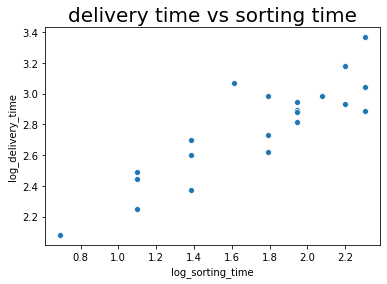

In [328]:
sns.scatterplot(x='log_sorting_time',y='log_delivery_time',data=DT)
plt.title('delivery time vs sorting time',size=20)
plt.show()

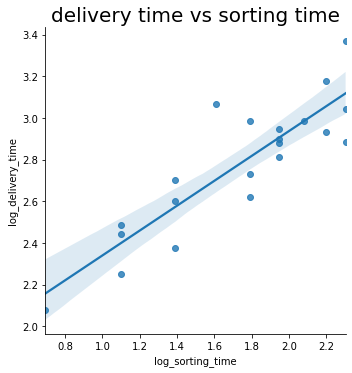

In [329]:
sns.lmplot(x='log_sorting_time',y='log_delivery_time',data=DT)
plt.title('delivery time vs sorting time',size=20)
plt.show()

#### some what linear

### check for normality

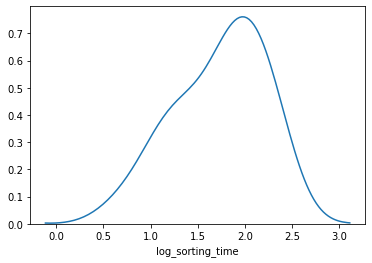

In [330]:
sns.distplot( DT['log_sorting_time'],hist=False)

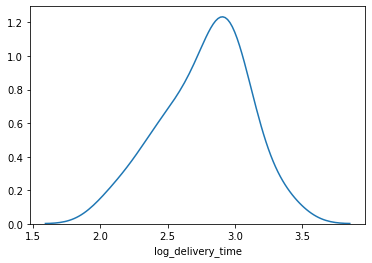

In [331]:
sns.distplot( DT['log_delivery_time'],hist=False)

##### it is normaily distributed 

## corrilation

In [332]:
 DT.corr()

,delivery_time,sorting_time,log_sorting_time,log_delivery_time
delivery_time,1.000000,0.825997,0.833933,0.981502
sorting_time,0.825997,1.000000,0.977447,0.843177
log_sorting_time,0.833933,0.977447,1.000000,0.878727
log_delivery_time,0.981502,0.843177,0.878727,1.000000


### it is 87 percent corrilated

### no multicollinarity :-> as there in only one input ,so no dependency between the input variable

# model building| model training 
as in stats model -> model building and training encounter at the same time

In [333]:
import statsmodels.formula.api as smf

In [334]:
 model_2=smf.ols('log_delivery_time ~ log_sorting_time',data= DT).fit()## model training and building is done

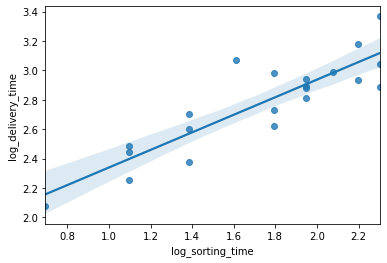

In [335]:
sns.regplot(x="log_sorting_time", y="log_delivery_time", data= DT)
plt.show()

## model evaluation

In [336]:
# coefficients
model_2.params

Intercept           1.741987
log_sorting_time    0.597522
dtype: float64

In [337]:
model_2.pvalues

Intercept           5.921137e-11
log_sorting_time    1.601539e-07
dtype: float64

## hypohesis formulation:-
H0= it is not a significant paramters   when>0.05  ,
Ha= it is significant parameters      when<0.05
### so we reject the null hypothesis as it is significant i.e pvalues<0.05

In [338]:
#R squared values
(model_2.rsquared,model_2.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

## by appling log transformation we can see that the r2 and adj_r2 value decreases

In [339]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_delivery_time   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           1.60e-07
Time:                        22:23:27   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7420      0.133     13.086      0.000       1.463       2.021
log_sorting_time     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  manual testing

In [340]:
# coefficients
model_2.params

Intercept           1.741987
log_sorting_time    0.597522
dtype: float64

In [341]:

 x=11

0.597522*11+ 1.741987

8.314729

In [342]:

 x=12
0.597522*12+ 1.741987

8.912251

In [343]:

 x=13
    
0.597522*13+ 1.741987


9.509773

In [344]:

 x=14

0.597522*14+ 1.741987




10.107295

In [345]:

 x=15

0.597522*15+ 1.741987

10.704817

### model testing

In [346]:
#Predict for 11,12,13,14,15 sorting times
newdata=pd.Series([11,12,13,14,15])

In [347]:
data_pred=pd.DataFrame(newdata,columns=['log_sorting_time'])

In [348]:
model_2.predict(data_pred)

0     8.314733
1     8.912255
2     9.509777
3    10.107300
4    10.704822
dtype: float64

In [349]:
from statsmodels.graphics.regressionplots import influence_plot

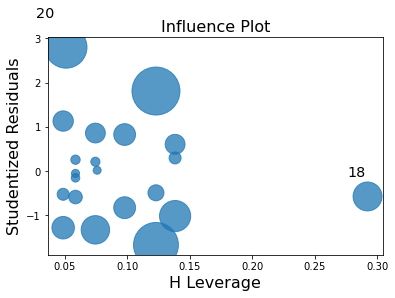

In [350]:
influence_plot(model_2)
plt.show()


In [351]:
import warnings
warnings.filterwarnings('ignore')

### checking for outliers with the help of cooks distance

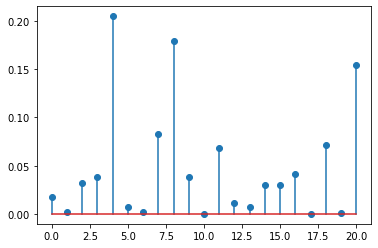

In [352]:
model_2_influence=model_2.get_influence()
(c,_)=model_2_influence.cooks_distance
# plot the influence values using stem plot
#fig=plt.subplot(fig size=(20,7))
plt.stem(np.arange(len(DT)),np.round(c,3))
#plt.xlable('Row index')
#plt.ylable('cooks distance')
plt.show()

## removing the outliers to increase the performance of our data

In [353]:
DT.drop(axis=0,index=[4,8,20],inplace=True)

In [354]:
DT.shape

(18, 4)

In [355]:
DT.corr()

,delivery_time,sorting_time,log_sorting_time,log_delivery_time
delivery_time,1.000000,0.912816,0.915295,0.988661
sorting_time,0.912816,1.000000,0.979218,0.904528
log_sorting_time,0.915295,0.979218,1.000000,0.930518
log_delivery_time,0.988661,0.904528,0.930518,1.000000


In [356]:
## using cooks distance in terms of log 93.per

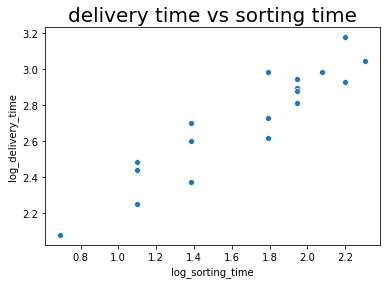

In [357]:
sns.scatterplot(x='log_sorting_time',y='log_delivery_time',data=DT)
plt.title('delivery time vs sorting time',size=20)
plt.show()

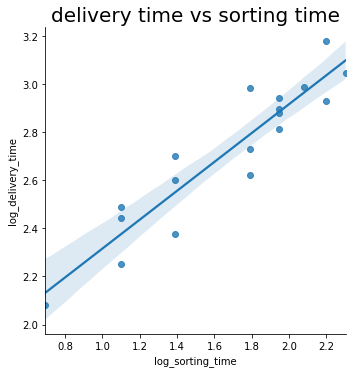

In [358]:
sns.lmplot(x='log_sorting_time',y='log_delivery_time',data=DT)
plt.title('delivery time vs sorting time',size=20)
plt.show()

# model building| model training 
as in stats model -> model building and training encounter at the same time

In [359]:
import statsmodels.formula.api as smf

In [360]:
 model_4=smf.ols('log_delivery_time ~ log_sorting_time',data= DT).fit()## model training and building is done

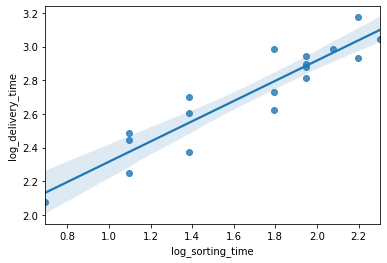

In [361]:
sns.regplot(x="log_sorting_time", y="log_delivery_time", data= DT)
plt.show()

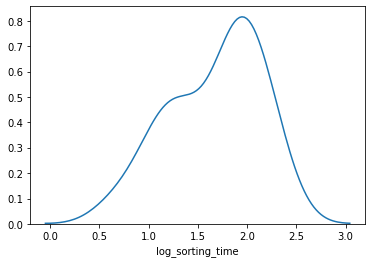

In [362]:
sns.distplot( DT['log_sorting_time'],hist=False)

## model evaluation

In [363]:
# coefficients
model_4.params

Intercept           1.715256
log_sorting_time    0.600858
dtype: float64

In [364]:
model_4.pvalues

Intercept           1.430021e-11
log_sorting_time    2.193064e-08
dtype: float64

## hypohesis formulation:-
H0= it is not a significant paramters   when>0.05  ,
Ha= it is significant parameters      when<0.05
### so we reject the null hypothesis as it is significant i.e pvalues<0.05

In [365]:
#R squared values
(model_4.rsquared,model_4.rsquared_adj)

(0.8658646170602785, 0.8574811556265459)

### here we can see that the contribution of r2 and aj_r2 increases from 66 to 83 percentanges

In [366]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_delivery_time   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           2.19e-08
Time:                        22:23:42   Log-Likelihood:                 14.778
No. Observations:                  18   AIC:                            -25.56
Df Residuals:                      16   BIC:                            -23.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7153      0.102     16.761      0.000       1.498       1.932
log_sorting_time     0.6009      0.059     10.163      0.000       0.476       0.726
==============================================================================
Omnibus:                        1.014   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.749
Skew:                           0.064   Prob(JB):                        0.688
Kurtosis:                       2.009   Cond. No.                         8.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## with the help of summary we can see the lot of changes in AIC BIC values
### skewness ,kurtosis

## using sqrt transformation

In [367]:
np.sqrt(DT['sorting_time'])
np.sqrt(DT['delivery_time'])

0     4.582576
1     3.674235
2     4.444097
3     4.898979
5     3.917908
6     4.358899
7     3.082207
9     4.330127
10    4.453089
11    3.278719
12    4.084116
13    3.391165
14    3.468429
15    3.857460
16    3.708099
17    4.255585
18    2.828427
19    4.222558
Name: delivery_time, dtype: float64

In [368]:
DT['sqrt_sorting_time']=np.sqrt(DT['sorting_time'])
DT['sqrt_delivery_time']=np.sqrt(DT['delivery_time'])
DT

,delivery_time,sorting_time,log_sorting_time,log_delivery_time,sqrt_sorting_time,sqrt_delivery_time
0,21.00,10,2.302585,3.044522,3.162278,4.582576
1,13.50,4,1.386294,2.602690,2.000000,3.674235
2,19.75,6,1.791759,2.983153,2.449490,4.444097
3,24.00,9,2.197225,3.178054,3.000000,4.898979
5,15.35,6,1.791759,2.731115,2.449490,3.917908
6,19.00,7,1.945910,2.944439,2.645751,4.358899
7,9.50,3,1.098612,2.251292,1.732051,3.082207
9,18.75,9,2.197225,2.931194,3.000000,4.330127
10,19.83,8,2.079442,2.987196,2.828427,4.453089
11,10.75,4,1.386294,2.374906,2.000000,3.278719


### initial analysis

In [369]:
DT.shape

(18, 6)

In [370]:
DT.isna().sum()

delivery_time         0
sorting_time          0
log_sorting_time      0
log_delivery_time     0
sqrt_sorting_time     0
sqrt_delivery_time    0
dtype: int64

In [371]:
DT.dtypes

delivery_time         float64
sorting_time            int64
log_sorting_time      float64
log_delivery_time     float64
sqrt_sorting_time     float64
sqrt_delivery_time    float64
dtype: object

### we performed all the inital analysis

## Assumptions ->->-> check

### 1. check for linearity

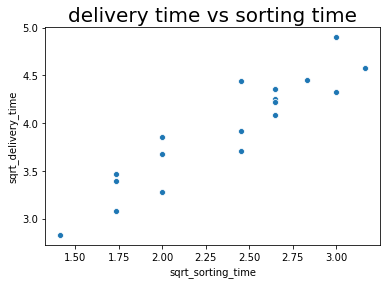

In [372]:
sns.scatterplot(x='sqrt_sorting_time',y='sqrt_delivery_time',data=DT)
plt.title('delivery time vs sorting time',size=20)
plt.show()

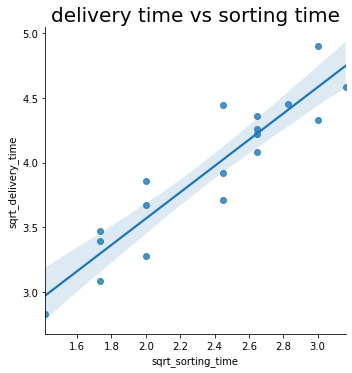

In [373]:
sns.lmplot(x='sqrt_sorting_time',y='sqrt_delivery_time',data=DT)
plt.title('delivery time vs sorting time',size=20)
plt.show()

#### some what linear

### check for normality

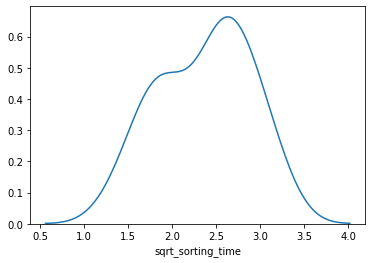

In [374]:
sns.distplot( DT['sqrt_sorting_time'],hist=False)

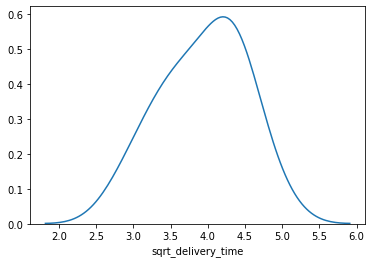

In [375]:
sns.distplot( DT['sqrt_delivery_time'],hist=False)

##### it is normaily distributed 

## corrilation

In [376]:
 DT.corr()

,delivery_time,sorting_time,log_sorting_time,log_delivery_time,sqrt_sorting_time,sqrt_delivery_time
delivery_time,1.000000,0.912816,0.915295,0.988661,0.918786,0.997208
sorting_time,0.912816,1.000000,0.979218,0.904528,0.995008,0.911680
log_sorting_time,0.915295,0.979218,1.000000,0.930518,0.994494,0.925696
log_delivery_time,0.988661,0.904528,0.930518,1.000000,0.921752,0.997097
sqrt_sorting_time,0.918786,0.995008,0.994494,0.921752,1.000000,0.923211
sqrt_delivery_time,0.997208,0.911680,0.925696,0.997097,0.923211,1.000000


### it is 85.3 percent corrilated

### no multicollinarity :-> as there in only one input ,so no dependency between the input variable

# model building| model training 
as in stats model -> model building and training encounter at the same time

In [377]:
import statsmodels.formula.api as smf

In [378]:
 model_3=smf.ols('sqrt_delivery_time ~ sqrt_sorting_time',data= DT).fit()## model training and building is done

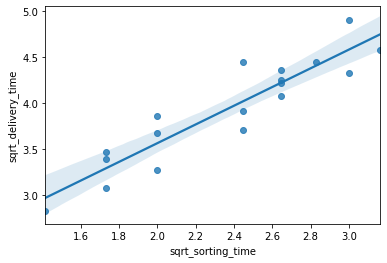

In [379]:
sns.regplot(x="sqrt_sorting_time", y="sqrt_delivery_time", data= DT)
plt.show()

## model evaluation

In [380]:
# coefficients
model_3.params

Intercept            1.536283
sqrt_sorting_time    1.015307
dtype: float64

In [381]:
model_3.pvalues

Intercept            1.782765e-05
sqrt_sorting_time    4.767707e-08
dtype: float64

## hypohesis formulation:-
H0= it is not a significant paramters   when>0.05  ,
Ha= it is significant parameters      when<0.05
### so we reject the null hypothesis as it is significant i.e pvalues<0.05

In [382]:
#R squared values
(model_3.rsquared,model_3.rsquared_adj)

(0.8523185700094705, 0.8430884806350625)

In [383]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sqrt_delivery_time   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     92.34
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           4.77e-08
Time:                        22:23:54   Log-Likelihood:                 2.4404
No. Observations:                  18   AIC:                           -0.8808
Df Residuals:                      16   BIC:                            0.9000
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.5363      0.255      6.020      0.000       0.995       2.077
sqrt_sorting_time     1.0153      0.106      9.609      0.000       0.791       1.239
==============================================================================
Omnibus:                        1.087   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                0.886
Skew:                           0.287   Prob(JB):                        0.642
Kurtosis:                       2.077   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  manual testing

In [384]:
# coefficients
model_3.params

Intercept            1.536283
sqrt_sorting_time    1.015307
dtype: float64

In [385]:
from statsmodels.graphics.regressionplots import influence_plot

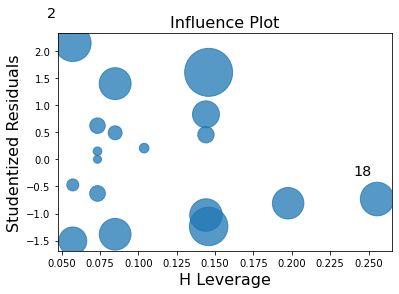

In [386]:
influence_plot(model_3)
plt.show()


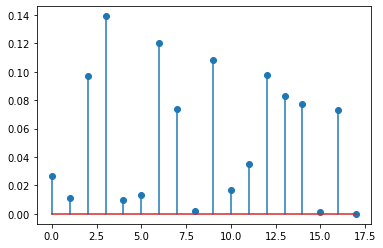

In [387]:
model_4_influence=model_4.get_influence()
(c,_)=model_4_influence.cooks_distance
# plot the influence values using stem plot
#fig=plt.subplot(fig size=(20,7))
plt.stem(np.arange(len(DT)),np.round(c,3))
#plt.xlable('Row index')
#plt.ylable('cooks distance')
plt.show()

## removing the outliers to increase the performance of our data

In [388]:
DT.drop(axis=0,index=[4,8,20],inplace=True)

KeyError: '[ 4  8 20] not found in axis'

In [389]:
DT.shape

(18, 6)

In [390]:
DT.corr()

,delivery_time,sorting_time,log_sorting_time,log_delivery_time,sqrt_sorting_time,sqrt_delivery_time
delivery_time,1.000000,0.912816,0.915295,0.988661,0.918786,0.997208
sorting_time,0.912816,1.000000,0.979218,0.904528,0.995008,0.911680
log_sorting_time,0.915295,0.979218,1.000000,0.930518,0.994494,0.925696
log_delivery_time,0.988661,0.904528,0.930518,1.000000,0.921752,0.997097
sqrt_sorting_time,0.918786,0.995008,0.994494,0.921752,1.000000,0.923211
sqrt_delivery_time,0.997208,0.911680,0.925696,0.997097,0.923211,1.000000


In [391]:
## using cooks distance in terms of sqrt 92 per

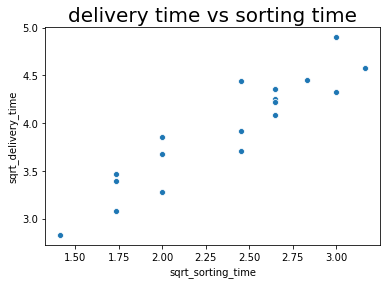

In [392]:
sns.scatterplot(x='sqrt_sorting_time',y='sqrt_delivery_time',data=DT)
plt.title('delivery time vs sorting time',size=20)
plt.show()

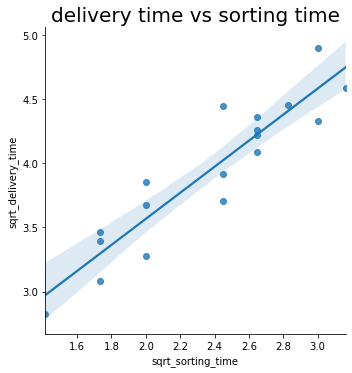

In [393]:
sns.lmplot(x='sqrt_sorting_time',y='sqrt_delivery_time',data=DT)
plt.title('delivery time vs sorting time',size=20)
plt.show()

# model building| model training 
as in stats model -> model building and training encounter at the same time

In [394]:
import statsmodels.formula.api as smf

In [395]:
 model_5=smf.ols('sqrt_delivery_time ~ sqrt_sorting_time',data= DT).fit()## model training and building is done

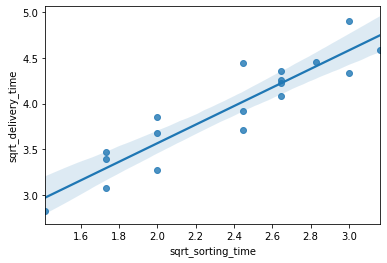

In [396]:
sns.regplot(x="sqrt_sorting_time", y="sqrt_delivery_time", data= DT)
plt.show()

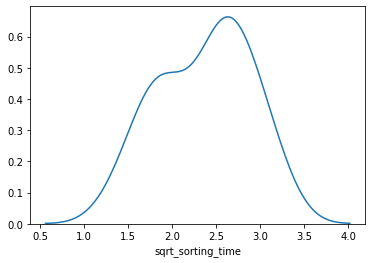

In [397]:
sns.distplot( DT['sqrt_sorting_time'],hist=False)

## model evaluation

In [398]:
# coefficients
model_5.params

Intercept            1.536283
sqrt_sorting_time    1.015307
dtype: float64

In [399]:
model_5.pvalues

Intercept            1.782765e-05
sqrt_sorting_time    4.767707e-08
dtype: float64

## hypohesis formulation:-
H0= it is not a significant paramters   when>0.05  ,
Ha= it is significant parameters      when<0.05
### so we reject the null hypothesis as it is significant i.e pvalues<0.05

In [400]:
#R squared values
(model_5.rsquared,model_5.rsquared_adj)

(0.8523185700094705, 0.8430884806350625)

### here we can see that the contribution of r2 and aj_r2 increases from 66 to 83 percentanges

In [401]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sqrt_delivery_time   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     92.34
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           4.77e-08
Time:                        22:24:05   Log-Likelihood:                 2.4404
No. Observations:                  18   AIC:                           -0.8808
Df Residuals:                      16   BIC:                            0.9000
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.5363      0.255      6.020      0.000       0.995       2.077
sqrt_sorting_time     1.0153      0.106      9.609      0.000       0.791       1.239
==============================================================================
Omnibus:                        1.087   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                0.886
Skew:                           0.287   Prob(JB):                        0.642
Kurtosis:                       2.077   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## with the help of summary we can see the lot of changes in AIC BIC values
### skewness ,kurtosis

## here we can see that our log model is best after removing outliers

###  manual testing

In [402]:
# coefficients
model_4.params

Intercept           1.715256
log_sorting_time    0.600858
dtype: float64

In [403]:

 x=11

0.600858*11+ 1.715256



8.324694

In [404]:

 x=12
0.600858*12+ 1.715256


8.925552

In [405]:

 x=13

0.600858*13+ 1.715256


9.52641

In [406]:

 x=14

0.600858*14+ 1.715256

10.127268

In [407]:

 x=15

0.600858*15+ 1.715256


10.728126

### model testing

In [408]:
#Predict for 11,12,13,14,15 sorting times
newdata=pd.Series([11,12,13,14,15])

In [409]:
data_pred=pd.DataFrame(newdata,columns=['log_sorting_time'])

In [410]:
model_4.predict(data_pred)
# the answer of manual testing and model testing is same ,it indicates that our model is functioning properly

0     8.324690
1     8.925548
2     9.526406
3    10.127263
4    10.728121
dtype: float64

# ->++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [418]:
x=DT[['log_sorting_time']]
y=DT[['log_delivery_time']]
y

,log_delivery_time
0,3.044522
1,2.602690
2,2.983153
3,3.178054
5,2.731115
6,2.944439
7,2.251292
9,2.931194
10,2.987196
11,2.374906


In [412]:
y_pred=model_4.predict(x)
y_pred

0     3.098782
1     2.548222
2     2.791848
3     3.035475
5     2.791848
6     2.884471
7     2.375366
9     3.035475
10    2.964704
11    2.548222
12    2.884471
13    2.375366
14    2.375366
15    2.548222
16    2.791848
17    2.884471
18    2.131739
19    2.884471
dtype: float64

In [419]:
error= y - y_pred
error=error.count().sum()
error

0

## zero reidual mean

In [420]:
np.mean(error) #   zero

0.0

### check for homoscadasicity

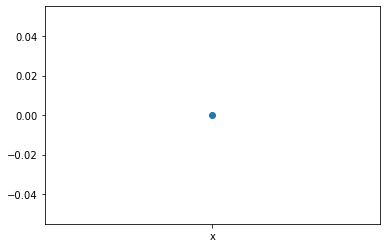

In [421]:
plt.scatter(x='x',y=error)

## model deployment
#### to convert python to binary

In [416]:
from pickle import dump

In [422]:
dump(model_4,open('linear_regressionQ1.pkl','wb'))

## ->===================================================================->